In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from pathlib import Path

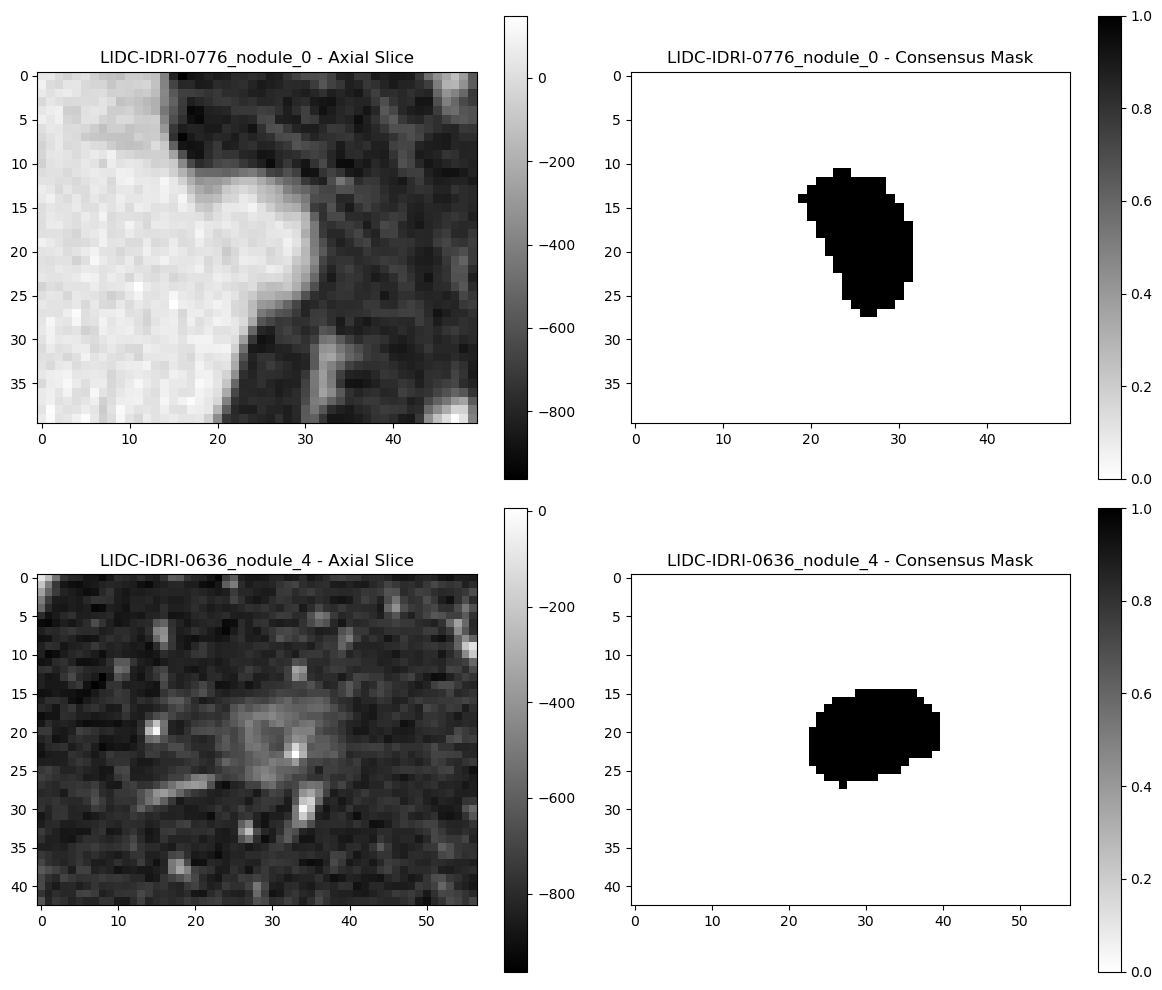

In [2]:
### Scans and consensusmasks visual comparison ###

# Get all volume files in the processed folder
processed_dir = "../data/processed"
vol_files = glob.glob(os.path.join(processed_dir, "*_vol.npy"))

if len(vol_files) < 2:
    print(f"Not enough processed files to plot (found {len(vol_files)}). Need at least 2.")
else:
    # Randomly select 2 distinct files
    selected_vols = np.random.choice(vol_files, size=2, replace=False)

    vol1 = np.load(selected_vols[0])
    mask1 = np.load(selected_vols[0].replace('_vol.npy', '_mask.npy'))

    vol2 = np.load(selected_vols[1])
    mask2 = np.load(selected_vols[1].replace('_vol.npy', '_mask.npy'))

    mid_slice1 = vol1.shape[2] // 2
    mid_slice2 = vol2.shape[2] // 2
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Slice axis 2: vol[:, :, z]
    im0 = axes[0, 0].imshow(vol1[:, :, mid_slice1], cmap='gray')
    axes[0, 0].set_title(f'{os.path.basename(selected_vols[0])[:-8]} - Axial Slice')
    plt.colorbar(im0, ax=axes[0, 0])

    im1 = axes[0, 1].imshow(mask1[:, :, mid_slice1], cmap='binary')
    axes[0, 1].set_title(f'{os.path.basename(selected_vols[0])[:-8]} - Consensus Mask')
    plt.colorbar(im1, ax=axes[0, 1])

    im2 = axes[1, 0].imshow(vol2[:, :, mid_slice2], cmap='gray')
    axes[1, 0].set_title(f'{os.path.basename(selected_vols[1])[:-8]} - Axial Slice')
    plt.colorbar(im2, ax=axes[1, 0])

    im3 = axes[1, 1].imshow(mask2[:, :, mid_slice2], cmap='binary')
    axes[1, 1].set_title(f'{os.path.basename(selected_vols[1])[:-8]} - Consensus Mask')
    plt.colorbar(im3, ax=axes[1, 1])

    plt.tight_layout()
    plt.show()

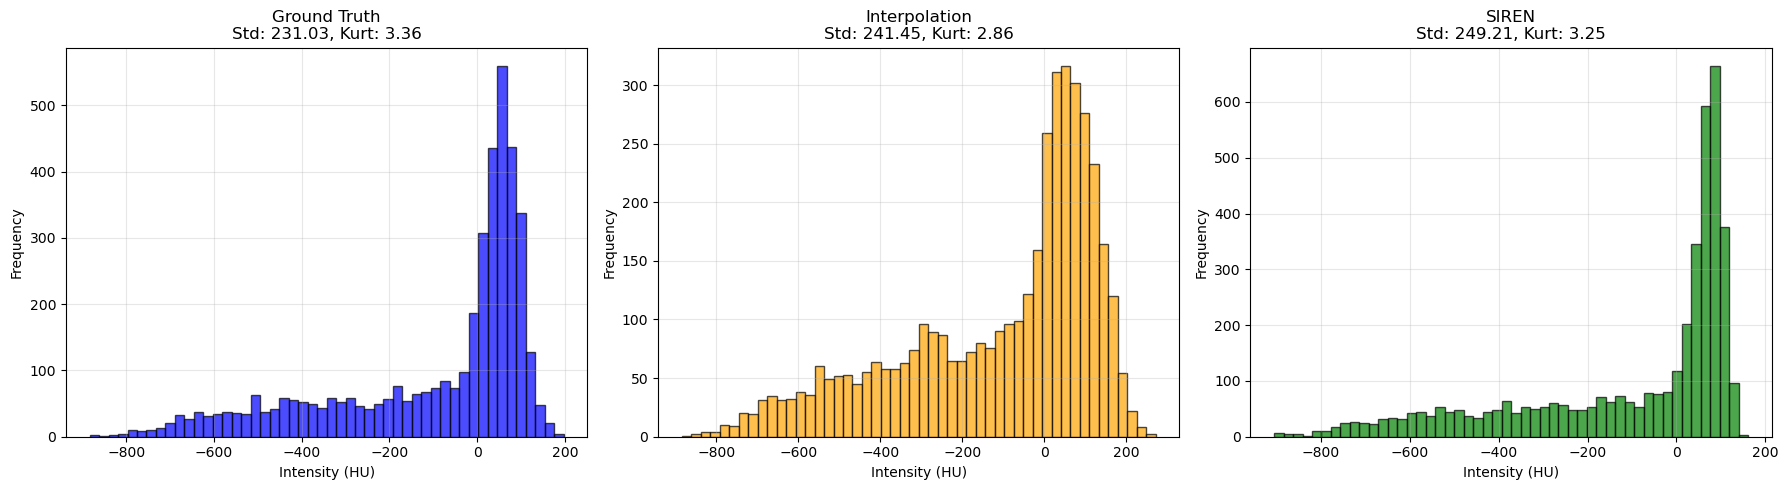


=== Internal Distribution Statistics (Inside Mask Only) ===

Ground Truth:
  Mean: -96.88 HU
  Std: 231.03 HU
  Kurtosis: 3.36
  Range: [-884.00, 197.00]

Interpolation:
  Mean: -108.25 HU
  Std: 241.45 HU
  Kurtosis: 2.86
  Range: [-884.00, 272.15]

SIREN:
  Mean: -102.77 HU
  Std: 249.21 HU
  Kurtosis: 3.25
  Range: [-905.53, 161.11]

=== Variance Preservation ===
Interpolation Std / GT Std: 1.045
SIREN Std / GT Std: 1.079


In [ ]:
### Single tumour internal distribution analysis ###

# Paths
nodule = "LIDC-IDRI-0521_nodule_0"
#nodule = "LIDC-IDRI-0651_nodule_0"
vol_path = f"../data/processed/{nodule}_vol.npy"
mask_path = f"../data/processed/{nodule}_mask.npy"
recon_interpolation_path = f"../data/reconstructed-interpolation/{nodule}_cubic_z_recon.npy"
recon_SIREN_path = f"../data/reconstructed-SIREN/{nodule}_siren_recon.npy"

vol = np.load(vol_path)
mask = np.load(mask_path)
recon_interpolation = np.load(recon_interpolation_path)
recon_SIREN = np.load(recon_SIREN_path)

# Extract pixels inside the ground truth mask
mask_bool = mask > 0

vol_masked = vol[mask_bool]
recon_interpolation_masked = recon_interpolation[mask_bool]
recon_SIREN_masked = recon_SIREN[mask_bool]

# Create histogram comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Ground Truth histogram
axes[0].hist(vol_masked, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title(f'Ground Truth\nStd: {np.std(vol_masked):.2f}, Kurt: {np.mean((vol_masked - np.mean(vol_masked))**4) / np.std(vol_masked)**4:.2f}')
axes[0].set_xlabel('Intensity (HU)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Interpolation histogram
axes[1].hist(recon_interpolation_masked, bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_title(f'Interpolation\nStd: {np.std(recon_interpolation_masked):.2f}, Kurt: {np.mean((recon_interpolation_masked - np.mean(recon_interpolation_masked))**4) / np.std(recon_interpolation_masked)**4:.2f}')
axes[1].set_xlabel('Intensity (HU)')
axes[1].set_ylabel('Frequency')
axes[1].grid(alpha=0.3)

# SIREN histogram
axes[2].hist(recon_SIREN_masked, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[2].set_title(f'SIREN\nStd: {np.std(recon_SIREN_masked):.2f}, Kurt: {np.mean((recon_SIREN_masked - np.mean(recon_SIREN_masked))**4) / np.std(recon_SIREN_masked)**4:.2f}')
axes[2].set_xlabel('Intensity (HU)')
axes[2].set_ylabel('Frequency')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n=== Internal Distribution Statistics (Inside Mask Only) ===")
print(f"\nGround Truth:")
print(f"  Mean: {np.mean(vol_masked):.2f} HU")
print(f"  Std: {np.std(vol_masked):.2f} HU")
print(f"  Kurtosis: {np.mean((vol_masked - np.mean(vol_masked))**4) / np.std(vol_masked)**4:.2f}")
print(f"  Range: [{np.min(vol_masked):.2f}, {np.max(vol_masked):.2f}]")

print(f"\nInterpolation:")
print(f"  Mean: {np.mean(recon_interpolation_masked):.2f} HU")
print(f"  Std: {np.std(recon_interpolation_masked):.2f} HU")
print(f"  Kurtosis: {np.mean((recon_interpolation_masked - np.mean(recon_interpolation_masked))**4) / np.std(recon_interpolation_masked)**4:.2f}")
print(f"  Range: [{np.min(recon_interpolation_masked):.2f}, {np.max(recon_interpolation_masked):.2f}]")

print(f"\nSIREN:")
print(f"  Mean: {np.mean(recon_SIREN_masked):.2f} HU")
print(f"  Std: {np.std(recon_SIREN_masked):.2f} HU")
print(f"  Kurtosis: {np.mean((recon_SIREN_masked - np.mean(recon_SIREN_masked))**4) / np.std(recon_SIREN_masked)**4:.2f}")
print(f"  Range: [{np.min(recon_SIREN_masked):.2f}, {np.max(recon_SIREN_masked):.2f}]")

print(f"\n=== Variance Preservation ===")
print(f"Interpolation Std / GT Std: {np.std(recon_interpolation_masked) / np.std(vol_masked):.3f}")
print(f"SIREN Std / GT Std: {np.std(recon_SIREN_masked) / np.std(vol_masked):.3f}")

recon_interpolation shape: (48, 57, 52), dtype: float32
recon_SIREN shape: (48, 57, 52), dtype: float32


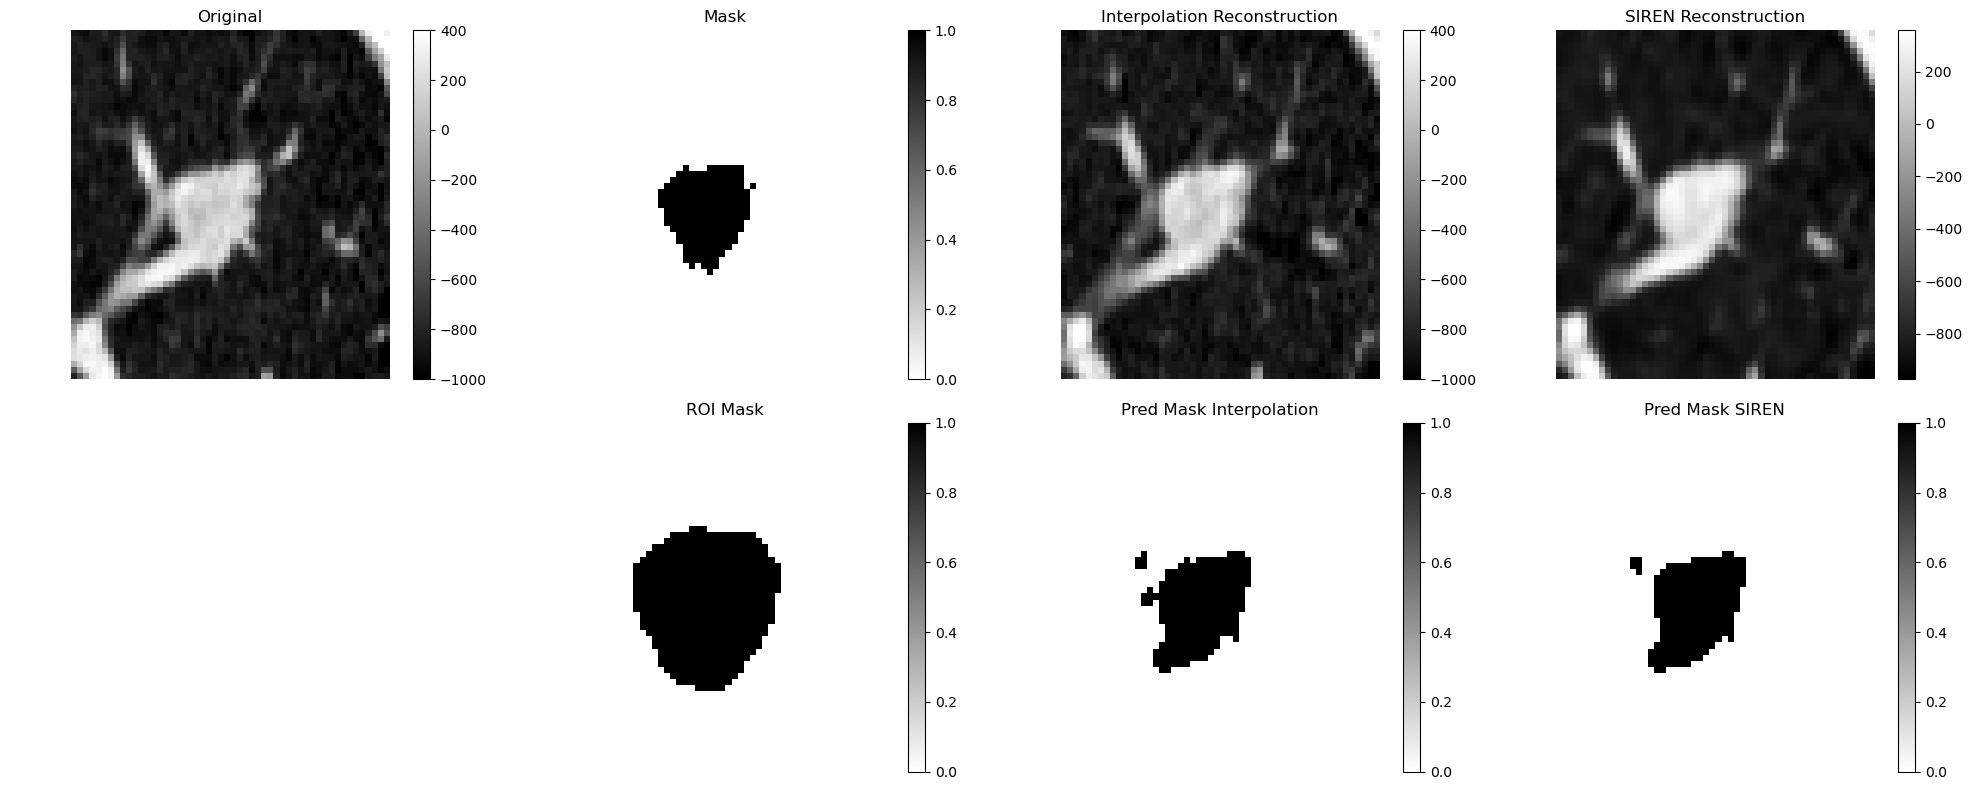

In [ ]:
### Reconstructions combined visual comparison ###

# Pick a random nodule from processed volumes
processed_dir = "../data/processed"
vol_files = glob.glob(os.path.join(processed_dir, "*_vol.npy"))
if not vol_files:
    raise FileNotFoundError(f"No *_vol.npy files found in {processed_dir}")
vol_path = np.random.choice(vol_files)

# Derive nodule id and related paths
nodule = os.path.basename(vol_path).replace("_vol.npy", "")
vol_path = f"../data/processed/{nodule}_vol.npy"
mask_path = f"../data/processed/{nodule}_mask.npy"
roi_mask_path = f"../data/processed/{nodule}_roi_mask.npy"
recon_interpolation_path = f"../data/reconstructed-interpolation/{nodule}_cubic_z_recon.npy"
recon_SIREN_path = f"../data/reconstructed-SIREN/{nodule}_siren_recon.npy"
pred_mask_interpolation_path = f"../data/pred_masks_interpolation/{nodule}_pred_mask.npy"
pred_mask_siren_path = f"../data/pred_masks_siren/{nodule}_pred_mask.npy"

vol = np.load(vol_path)
mask = np.load(mask_path)
roi_mask = np.load(roi_mask_path)
recon_interpolation = np.load(recon_interpolation_path)
recon_SIREN = np.load(recon_SIREN_path)
pred_mask_interpolation = np.load(pred_mask_interpolation_path)
pred_mask_siren = np.load(pred_mask_siren_path)

print(f"recon_interpolation shape: {recon_interpolation.shape}, dtype: {recon_interpolation.dtype}")
print(f"recon_SIREN shape: {recon_SIREN.shape}, dtype: {recon_SIREN.dtype}")
vol = np.clip(vol, -1000, 400)

# pick relative slice index (e.g., middle)
z = (vol.shape[0] // 2)

fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Row 1
im0 = axes[0, 0].imshow(vol[z], cmap="gray"); axes[0, 0].set_title("Original")
im1 = axes[0, 1].imshow(mask[z], cmap="binary"); axes[0, 1].set_title("Mask")
im2 = axes[0, 2].imshow(recon_interpolation[z], cmap="gray"); axes[0, 2].set_title("Interpolation Reconstruction")
im3 = axes[0, 3].imshow(recon_SIREN[z], cmap="gray"); axes[0, 3].set_title("SIREN Reconstruction")

# Row 2
axes[1, 0].axis("off")
im1b = axes[1, 1].imshow(roi_mask[z], cmap="binary"); axes[1, 1].set_title("ROI Mask")
im4 = axes[1, 2].imshow(pred_mask_interpolation[z], cmap="binary"); axes[1, 2].set_title("Pred Mask Interpolation")
im5 = axes[1, 3].imshow(pred_mask_siren[z], cmap="binary"); axes[1, 3].set_title("Pred Mask SIREN")

# add intensity scales
plt.colorbar(im0, ax=axes[0, 0])
plt.colorbar(im1, ax=axes[0, 1])
plt.colorbar(im2, ax=axes[0, 2])
plt.colorbar(im3, ax=axes[0, 3])
plt.colorbar(im1b, ax=axes[1, 1])
plt.colorbar(im4, ax=axes[1, 2])
plt.colorbar(im5, ax=axes[1, 3])

for ax in axes.flat:
    if ax.has_data():
        ax.axis("off")
plt.tight_layout()
plt.show()

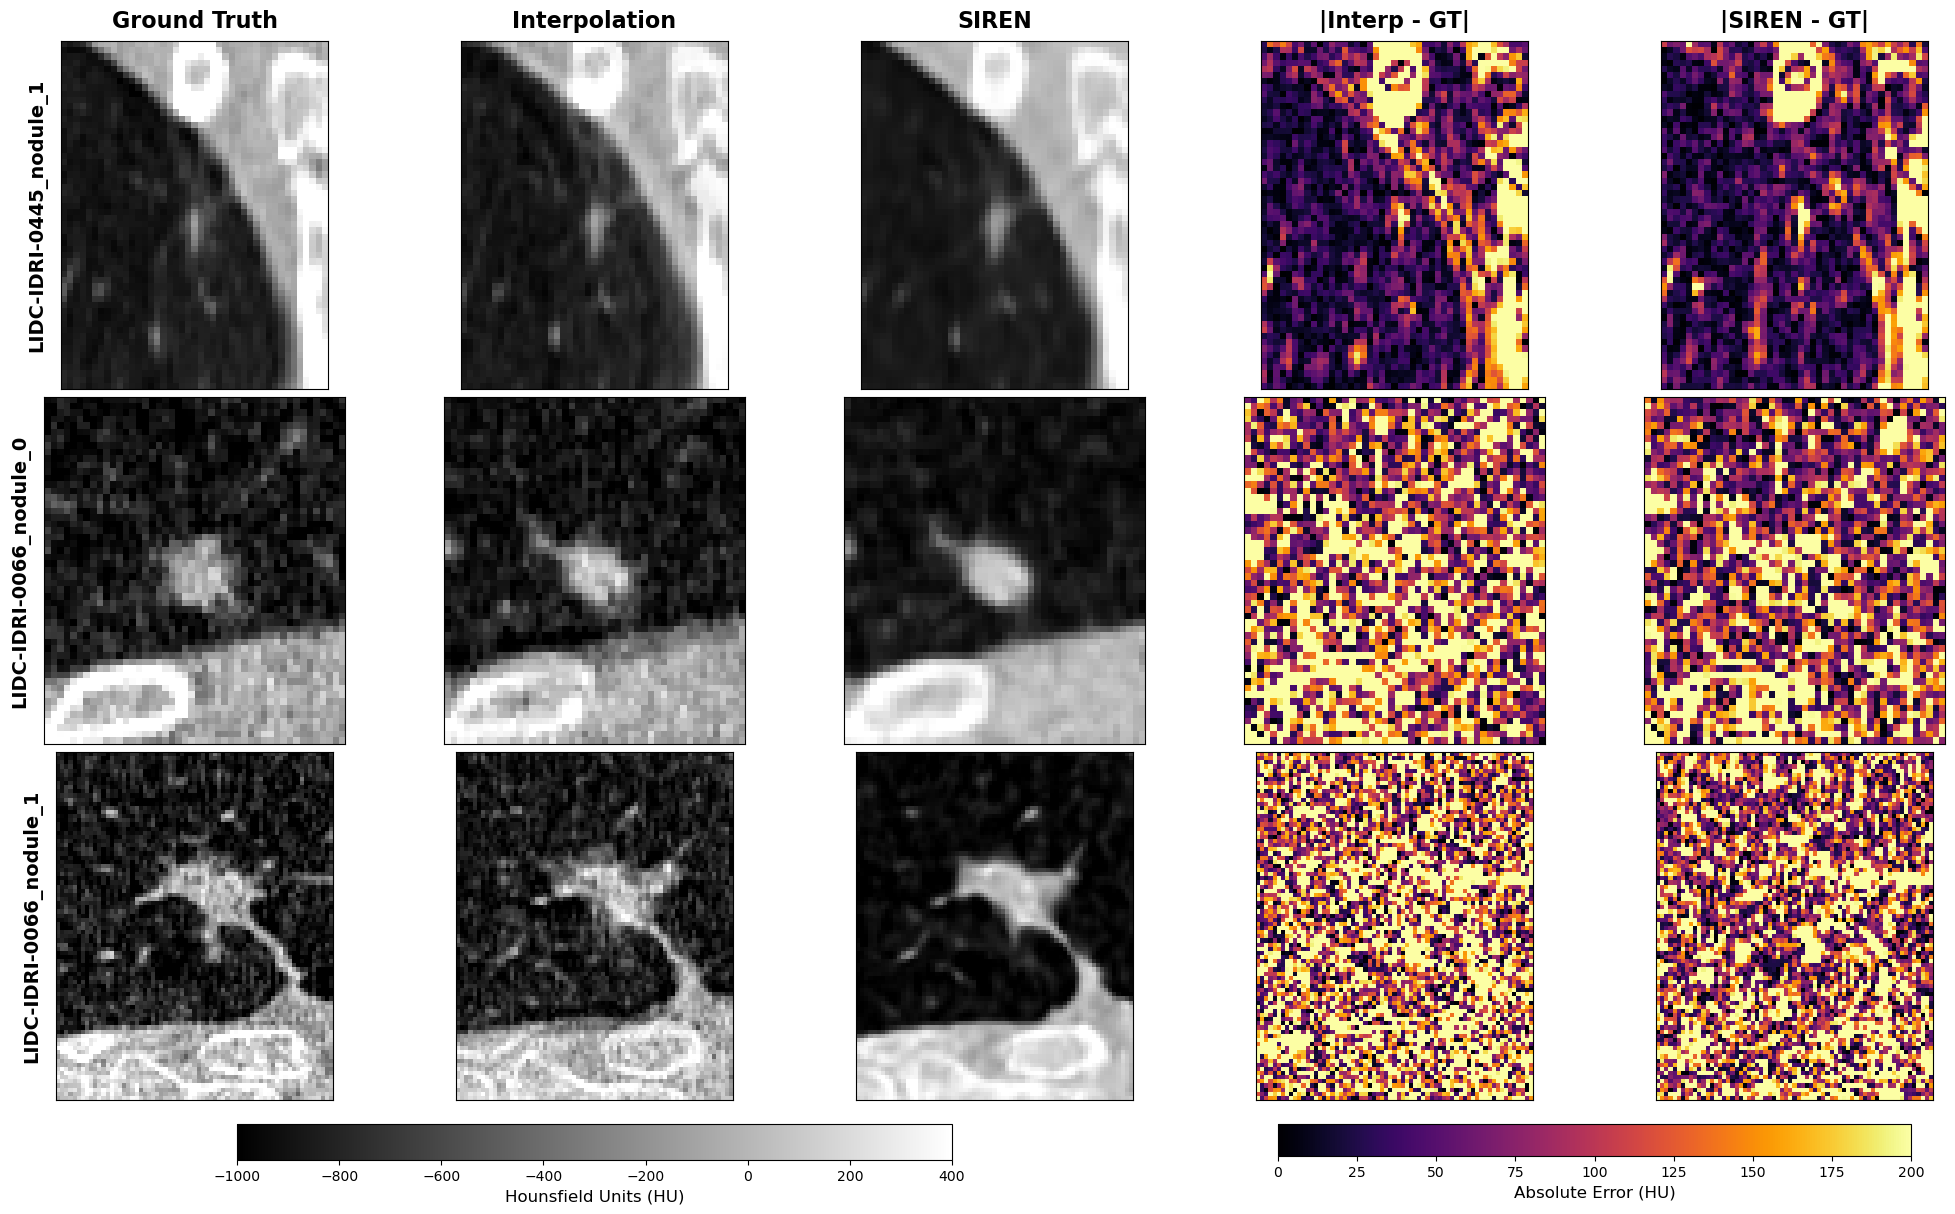

In [ ]:
### Voluemtric density reconstruction visual comparison ###

# List of nodules to compare
# Option 1: Predefined list
nodules = ["LIDC-IDRI-0445_nodule_1", "LIDC-IDRI-0066_nodule_0", "LIDC-IDRI-0066_nodule_1", "LIDC-IDRI-0314_nodule_0"]

# Option 2: Random selection
# logs_cubic_z_dir = Path(r"../logs/baselines")
# nodules = []
# for p in logs_cubic_z_dir.iterdir():
#     if p.is_file():
#         parts = p.stem.split("_")
#         if len(parts) >= 2 and parts[-2].isdigit() and parts[-1].isdigit():
#             parts = parts[:-2]
#         if parts and parts[-1].lower() == "cubic_z":
#             parts = parts[:-1]
#         if parts and parts[-1].lower() == "bicubic":  # Remove bicubic suffix
#             parts = parts[:-1]
#         patient_id = "_".join(parts)
#         nodules.append(patient_id)

import matplotlib.pyplot as plt
import numpy as np

# Select first 3 nodules
nodules = nodules[:3]

# Create figure with 3 rows × 5 columns
# Reduced height slightly to keep it tighter
fig, axes = plt.subplots(3, 5, figsize=(20, 12), constrained_layout=True)

# Shared settings
vmin_hu, vmax_hu = -1000, 400
vmin_err, vmax_err = 0, 200

# Store images for colorbar reference later
im_hu = None
im_err = None

cols = ["Ground Truth", "Interpolation", "SIREN", "|Interp - GT|", "|SIREN - GT|"]

for row, nodule in enumerate(nodules):
    # --- Data Loading (Same as your code) ---
    vol_path = f"../data/processed/{nodule}_vol.npy"
    recon_interpolation_path = f"../data/reconstructed-interpolation/{nodule}_cubic_z_recon.npy"
    recon_SIREN_path = f"../data/reconstructed-SIREN/{nodule}_siren_recon.npy"

    vol = np.load(vol_path)
    recon_interpolation = np.load(recon_interpolation_path)
    recon_SIREN = np.load(recon_SIREN_path)
    
    # Clip only for display
    vol_disp = np.clip(vol, vmin_hu, vmax_hu)
    recon_interp_disp = np.clip(recon_interpolation, vmin_hu, vmax_hu)
    recon_siren_disp = np.clip(recon_SIREN, vmin_hu, vmax_hu)

    z = vol.shape[0] // 2
    
    # Diffs
    diff_interp = np.abs(recon_interpolation - vol)
    diff_siren = np.abs(recon_SIREN - vol)

    # --- Plotting ---
    
    # 1. Ground Truth
    im_hu = axes[row, 0].imshow(vol_disp[z], cmap="gray", vmin=vmin_hu, vmax=vmax_hu)
    
    # 2. Interpolation
    axes[row, 1].imshow(recon_interp_disp[z], cmap="gray", vmin=vmin_hu, vmax=vmax_hu)
    
    # 3. SIREN
    axes[row, 2].imshow(recon_siren_disp[z], cmap="gray", vmin=vmin_hu, vmax=vmax_hu)
    
    # 4. Error Interp
    im_err = axes[row, 3].imshow(diff_interp[z], cmap="inferno", vmin=vmin_err, vmax=vmax_err)
    
    # 5. Error SIREN
    axes[row, 4].imshow(diff_siren[z], cmap="inferno", vmin=vmin_err, vmax=vmax_err)

    # --- Formatting ---
    
    # Row Labels (Nodule ID) on the left
    # We use the left-most axis to set a Y-label, but hide the ticks
    axes[row, 0].set_ylabel(f"{nodule}", fontsize=14, fontweight='bold', labelpad=10)
    
    # Turn off axis ticks/spines for all
    for col in range(5):
        axes[row, col].set_xticks([])
        axes[row, col].set_yticks([])
        # Only set column titles on the FIRST row
        if row == 0:
            axes[row, col].set_title(cols[col], fontsize=16, fontweight='bold', pad=10)

# --- Shared Colorbars ---

# Add colorbar for CT Images (Columns 0-2)
# Position: bottom of the first 3 columns
cbar_hu = fig.colorbar(im_hu, ax=axes[:, 0:3], location='bottom', shrink=0.6, pad=0.02)
cbar_hu.set_label('Hounsfield Units (HU)', fontsize=12)

# Add colorbar for Error Heatmaps (Columns 3-4)
# Position: bottom of the last 2 columns
cbar_err = fig.colorbar(im_err, ax=axes[:, 3:], location='bottom', shrink=0.8, pad=0.02)
cbar_err.set_label('Absolute Error (HU)', fontsize=12)

# Save
plt.savefig("nodule_comparison_visual.pdf", dpi=300, bbox_inches='tight')
plt.show()

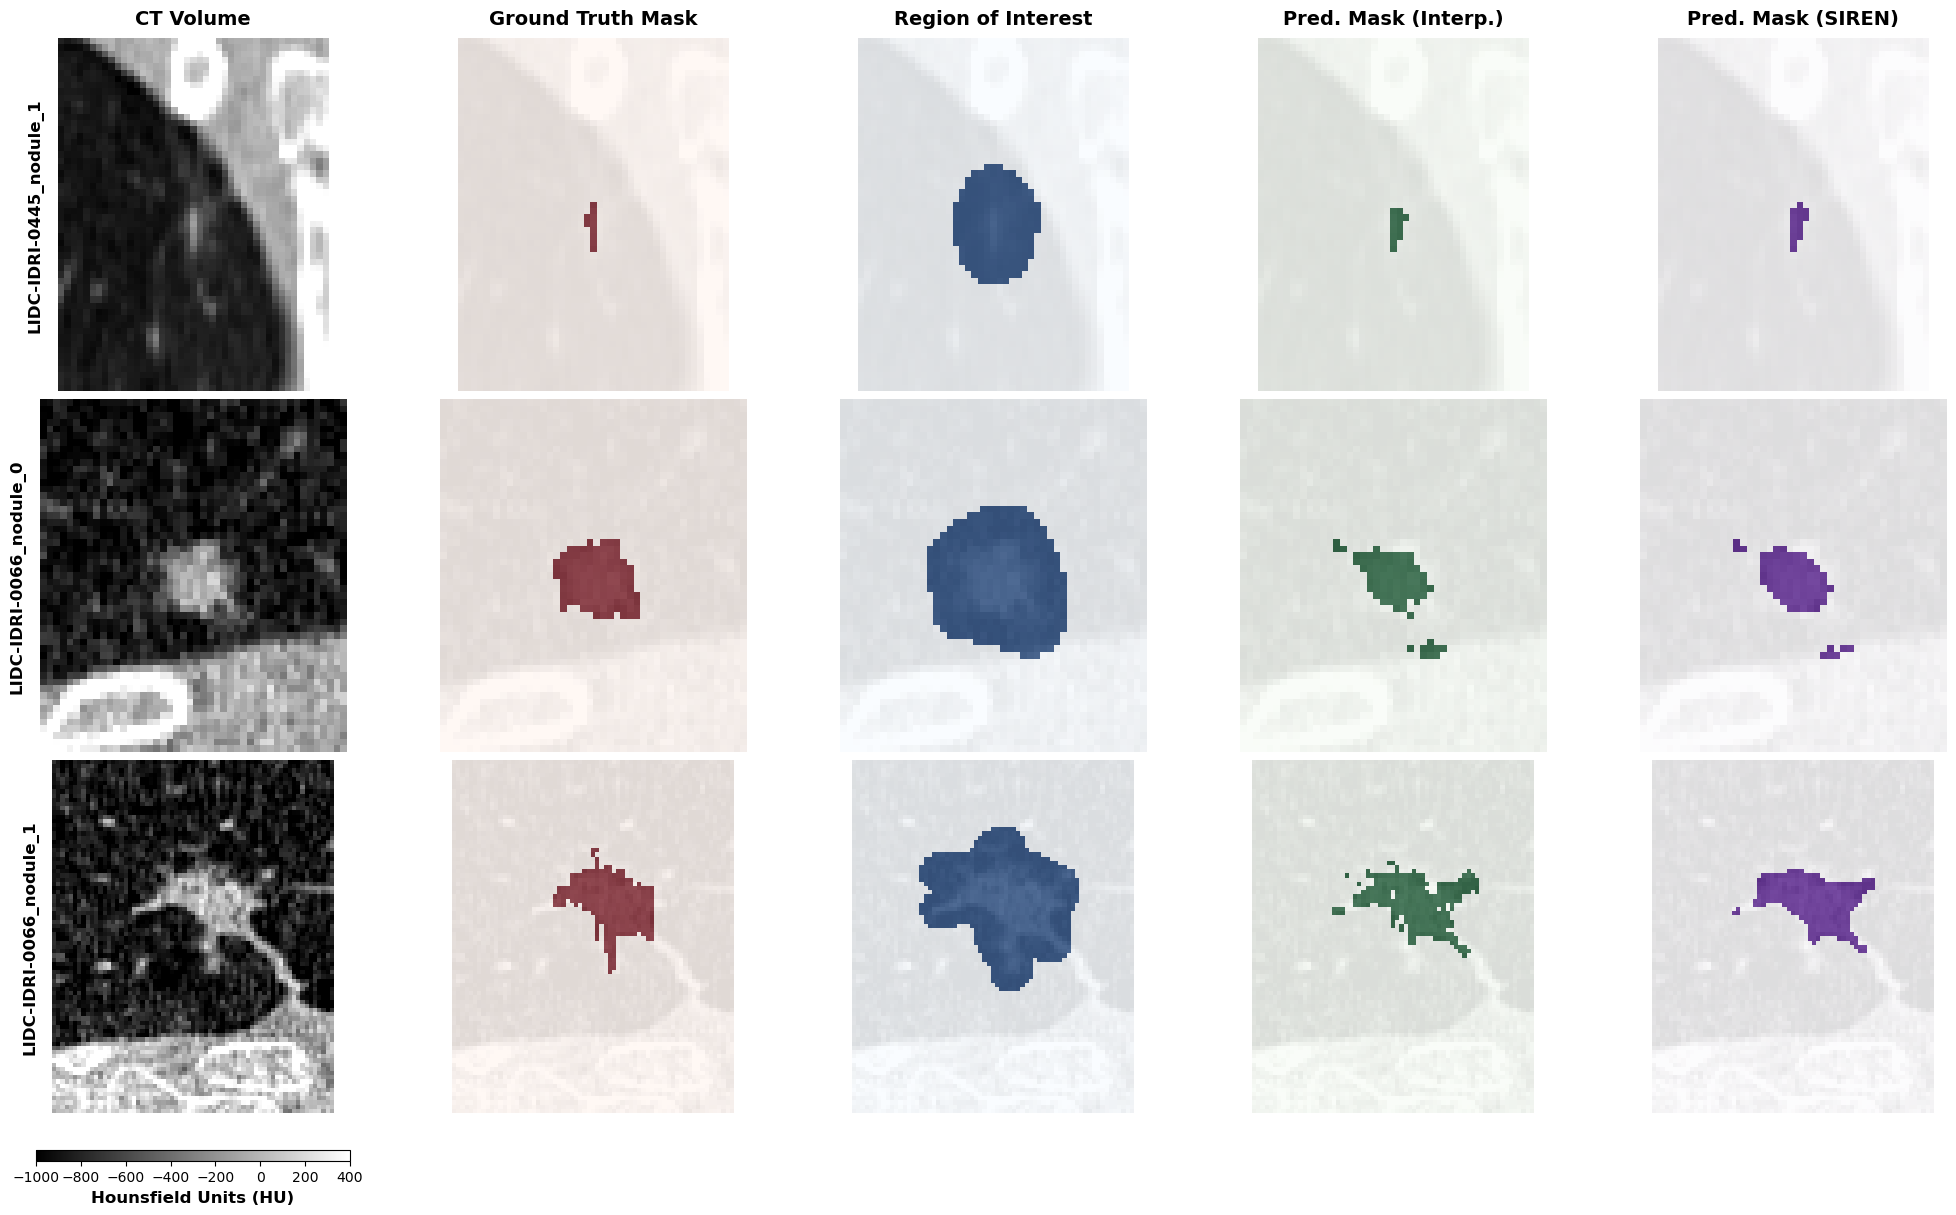

In [ ]:
### Nodule's masks reconstruction visual comparison ###

# ============================================================
# Option 1: Predefined list of nodule IDs
# ============================================================
nodules = ["LIDC-IDRI-0445_nodule_1", "LIDC-IDRI-0066_nodule_0", "LIDC-IDRI-0066_nodule_1", "LIDC-IDRI-0314_nodule_0"]

# ============================================================
# Option 2: Random selection from processed volumes
# ============================================================
# processed_dir = "../data/processed"
# vol_files = glob.glob(os.path.join(processed_dir, "*_vol.npy"))
# if not vol_files:
#     raise FileNotFoundError(f"No *_vol.npy files found in {processed_dir}")
# # Extract unique nodule IDs
# all_nodules = list(set([os.path.basename(f).replace("_vol.npy", "") for f in vol_files]))
# nodules = np.random.choice(all_nodules, size=min(3, len(all_nodules)), replace=False).tolist()

# Select first 3 nodules
nodules = nodules[:3]

# ============================================================
# Figure Setup
# ============================================================
fig, axes = plt.subplots(3, 5, figsize=(20, 12), constrained_layout=True)

# Shared display settings
vmin_hu, vmax_hu = -1000, 400

# Column titles
cols = ["CT Volume", "Ground Truth Mask", "Region of Interest", "Pred. Mask (Interp.)", "Pred. Mask (SIREN)"]

# Store reference images for colorbars
im_hu = None

for row, nodule in enumerate(nodules):
    # --- Data Loading ---
    vol_path = f"../data/processed/{nodule}_vol.npy"
    mask_path = f"../data/processed/{nodule}_mask.npy"
    roi_mask_path = f"../data/processed/{nodule}_roi_mask.npy"
    pred_mask_interpolation_path = f"../data/pred_masks_interpolation/{nodule}_pred_mask.npy"
    pred_mask_siren_path = f"../data/pred_masks_siren/{nodule}_pred_mask.npy"

    vol = np.load(vol_path)
    mask = np.load(mask_path)
    roi_mask = np.load(roi_mask_path)
    pred_mask_interpolation = np.load(pred_mask_interpolation_path)
    pred_mask_siren = np.load(pred_mask_siren_path)
    
    # Clip volume for display
    vol_disp = np.clip(vol, vmin_hu, vmax_hu)

    # Select middle slice
    z = vol.shape[0] // 2

    # --- Plotting ---
    
    # 1. CT Volume (Original)
    im_hu = axes[row, 0].imshow(vol_disp[z], cmap="gray", vmin=vmin_hu, vmax=vmax_hu)
    
    # 2. Ground Truth Mask (with volume underlay for context)
    axes[row, 1].imshow(vol_disp[z], cmap="gray", vmin=vmin_hu, vmax=vmax_hu, alpha=0.4)
    axes[row, 1].imshow(mask[z], cmap="Reds", alpha=0.7, vmin=0, vmax=1)
    
    # 3. ROI Mask (with volume underlay for context)
    axes[row, 2].imshow(vol_disp[z], cmap="gray", vmin=vmin_hu, vmax=vmax_hu, alpha=0.4)
    axes[row, 2].imshow(roi_mask[z], cmap="Blues", alpha=0.7, vmin=0, vmax=1)
    
    # 4. Predicted Mask (Interpolation)
    axes[row, 3].imshow(vol_disp[z], cmap="gray", vmin=vmin_hu, vmax=vmax_hu, alpha=0.4)
    axes[row, 3].imshow(pred_mask_interpolation[z], cmap="Greens", alpha=0.7, vmin=0, vmax=1)
    
    # 5. Predicted Mask (SIREN)
    axes[row, 4].imshow(vol_disp[z], cmap="gray", vmin=vmin_hu, vmax=vmax_hu, alpha=0.4)
    axes[row, 4].imshow(pred_mask_siren[z], cmap="Purples", alpha=0.7, vmin=0, vmax=1)

    # --- Formatting ---
    
    # Row labels (nodule ID) on the left
    axes[row, 0].set_ylabel(f"{nodule}", fontsize=12, fontweight='bold', labelpad=10)
    
    # Remove axis ticks/spines for all subplots
    for col in range(5):
        axes[row, col].set_xticks([])
        axes[row, col].set_yticks([])
        for spine in axes[row, col].spines.values():
            spine.set_visible(False)
        # Set column titles only on the first row
        if row == 0:
            axes[row, col].set_title(cols[col], fontsize=14, fontweight='bold', pad=10)

# ============================================================
# Shared Colorbar for CT Volume
# ============================================================
cbar_hu = fig.colorbar(im_hu, ax=axes[:, 0], location='bottom', shrink=0.8, pad=0.03, aspect=30)
cbar_hu.set_label('Hounsfield Units (HU)', fontsize=12, fontweight='bold')
cbar_hu.ax.tick_params(labelsize=10)

# ============================================================
# Save and Display
# ============================================================
plt.savefig("nodule_masks_comparison.pdf", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()